In [200]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/creditcardfraud/creditcard.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [203]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [204]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [205]:
actual = df.loc[df['Class'] == 0]
fraud = df.loc[df['Class'] == 1]

In [206]:
print(actual.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [207]:
actual_data=actual.sample(492)
print(actual_data.shape)

(492, 31)


In [208]:
df_new=pd.concat([fraud,actual_data],axis=0)
print(df_new.shape)
print(type(df_new))

(984, 31)
<class 'pandas.core.frame.DataFrame'>


In [209]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [210]:
x=df_new.drop(columns='Class',axis=1)
print(x.shape)
x

(984, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97827,66401.0,-0.815193,0.023007,1.298165,-1.731480,-0.446325,-0.614194,0.215468,-0.023127,-0.078885,...,0.043716,-0.020403,0.147898,-0.006783,-0.010678,-0.235974,-0.438389,0.171447,0.042717,18.20
256361,157656.0,-0.800762,0.641564,-0.054247,-1.035357,1.055921,1.076859,0.404843,0.770552,-0.309807,...,-0.249907,0.423955,1.396833,-0.270520,-1.323861,-0.079929,0.330706,0.052232,0.051571,25.00
235395,148369.0,0.036976,0.757155,0.233513,-0.595435,0.352151,-1.029709,0.912043,-0.103402,0.156222,...,-0.123432,-0.273500,-0.667795,0.086536,-0.126618,-0.538559,0.152120,0.241247,0.093439,4.49
256301,157631.0,1.947890,-0.358748,-0.522121,0.604621,-0.522815,-0.570581,-0.305251,-0.167465,1.276371,...,-0.146883,0.223613,1.003003,0.010888,0.063228,0.137417,-0.114605,0.034927,-0.041208,26.55


In [211]:
y= df_new[['Class']]
print(y.shape)

(984, 1)


In [212]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,stratify=y,random_state=42)

In [213]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (787, 30)
Shape of x_test: (197, 30)
Shape of y_train: (787, 1)
Shape of y_test: (197, 1)


In [214]:
from sklearn.linear_model import LogisticRegression

In [215]:
lm = LogisticRegression(max_iter=1000)
print(lm)
y_train=y_train.values.ravel()

LogisticRegression(max_iter=1000)


In [216]:
lm.fit(x_train, y_train.ravel())

LogisticRegression(max_iter=1000)

In [217]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_train_pred = lm.predict(x_train)
train_accuracy = accuracy_score(y_train_pred, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9135959339263025


In [218]:
y_pred_lm = lm.predict(x_test)
test_accuracy_lm = accuracy_score(y_pred_lm, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9644670050761421


In [219]:
accuracy_lm = accuracy_score(y_test, y_pred_lm)
precision_lm=precision_score(y_test, y_pred_lm)
recall_lm=recall_score(y_test, y_pred_lm)
f1_lm=f1_score(y_test, y_pred_lm)
roc_auc_lm=roc_auc_score(y_test, y_pred_lm)

In [220]:
print("Accuracy:", accuracy_lm)
print("Precision:", precision_lm)
print("Recall:", recall_lm)
print("F1 Score:", f1_lm)
print("ROC AUC Score:", roc_auc_lm)

Accuracy: 0.9390862944162437
Precision: 0.9387755102040817
Recall: 0.9387755102040817
F1 Score: 0.9387755102040817
ROC AUC Score: 0.9390847247990107


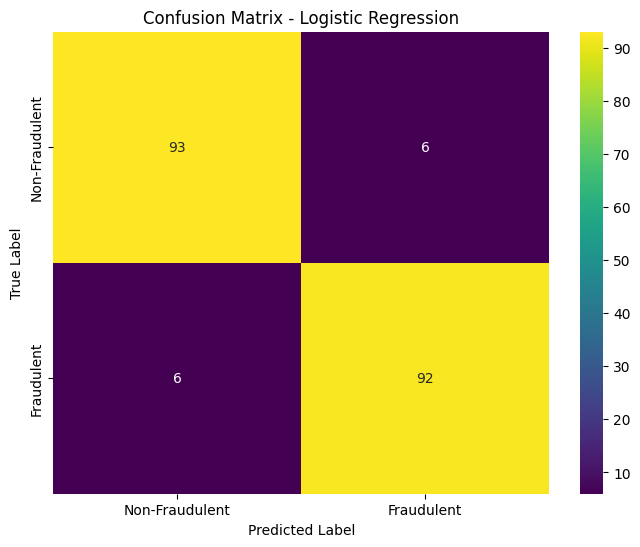

In [221]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm_lr = confusion_matrix(y_test, y_pred_lm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='viridis', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

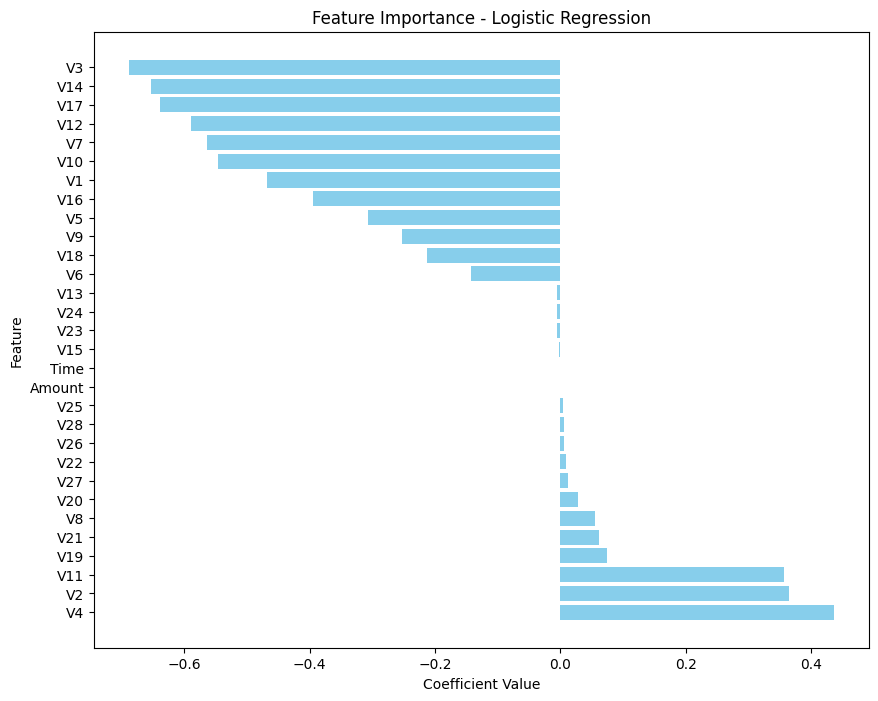

In [222]:
coefficients = lm.coef_[0]
feature_names = x_train.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.show()


In [223]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier(n_estimators=100)

In [224]:
rm.fit(x_train, y_train)

RandomForestClassifier()

In [225]:
y_pred_rf = rm.predict(x_test)
train_accuracy = accuracy_score(y_train_pred, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9135959339263025


In [226]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [227]:
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC AUC Score:", roc_auc_rf)

Accuracy: 0.9441624365482234
Precision: 0.9484536082474226
Recall: 0.9387755102040817
F1 Score: 0.9435897435897437
ROC AUC Score: 0.9441352298495156


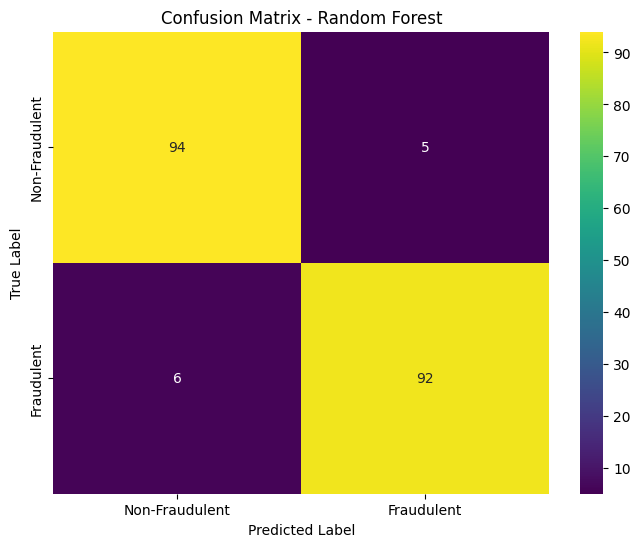

In [228]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='viridis', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

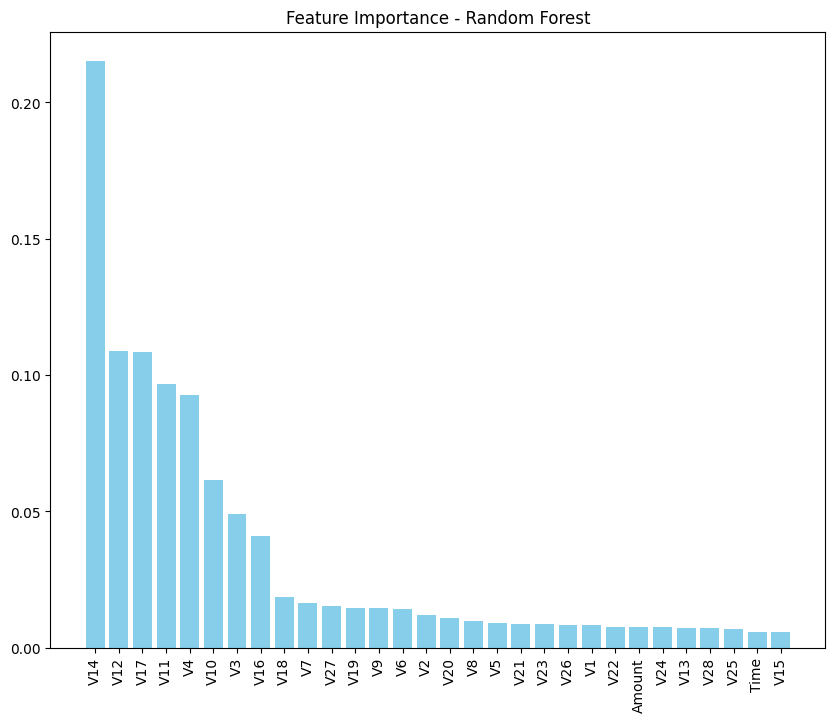

In [229]:
importances = rm.feature_importances_
indices = np.argsort(importances)[::-1]
names = [x_train.columns[i] for i in indices]
plt.figure(figsize=(10, 8))
plt.title("Feature Importance - Random Forest")
plt.bar(range(x_train.shape[1]), importances[indices], color='skyblue')
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

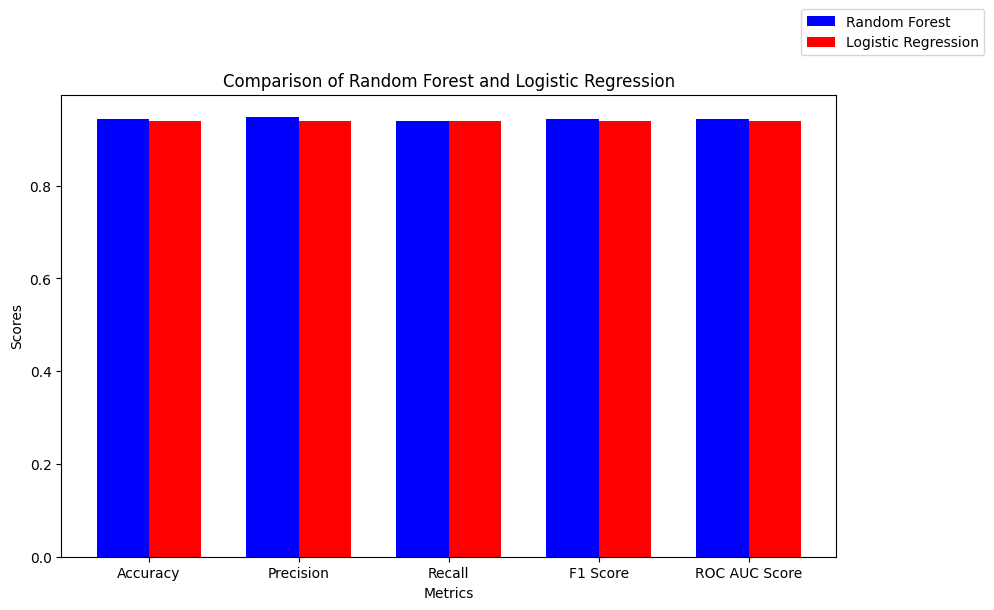

In [233]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
rf_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
lr_scores = [accuracy_lm, precision_lm, recall_lm, f1_lm, roc_auc_lm]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics))

plt.bar(index, rf_scores, bar_width, label='Random Forest', color='b')
plt.bar([i + bar_width for i in index], lr_scores, bar_width, label='Logistic Regression', color='r')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Random Forest and Logistic Regression')
plt.xticks([i + bar_width / 2 for i in index], metrics)
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.2))
plt.show()